In [230]:
import pickle

import sys
sys.path.insert(0, 'src') 
sys.path.insert(0, '/data/ch52669/gene_interaction/tot-gene-sets/MedAgents') 
import os
import json
from functools import partial

In [231]:
import seaborn as sns

In [233]:
with open('results/eval_gprofiler_0_99.pkl', 'rb') as f:
    gprofiler_results = pickle.load(f)
    
with open('results2/tot_eval_uncertainty_5steps_abla_uncertain_False.pkl', 'rb') as f:
    tot_results = pickle.load(f)
    tot_results = tot_results[:30]
    
with open('results2/tot_eval_uncertainty_5steps.pkl', 'rb') as f:
    tot_results2 = pickle.load(f)
    tot_results2 = tot_results2[:30]
    
medagent_results = []
for i in range(0, 30):
    with open(f'medagents_results/eval_medagents_gprofiler_step3_{i}.pkl', 'rb') as f:
        medagent_result = pickle.load(f)
        medagent_results.extend(medagent_result)
        
with open('results2/tot2_eval_15gen_5steps_no_certainty_9nodes.pkl', 'rb') as f:
    tot2_eval_15gen_5steps_no_certainty_9nodes = pickle.load(f)
    tot2_eval_15gen_5steps_no_certainty_9nodes = tot2_eval_15gen_5steps_no_certainty_9nodes[:]
    print(len(tot2_eval_15gen_5steps_no_certainty_9nodes)) 

100


In [207]:
# medagent_results[0]

In [208]:
# tot_results[0]

In [219]:
len(tot_results2)

29

In [187]:
count = 0
b_example = []
for t in tot_results:
    if count == 2:
        break
    if t['best similarity score'] > 0.98:
        b_example.append(t)
        count +=1


In [188]:
# n = '''Let's think step by step:
#     Step: 1. Biological Process: Metabolism. Reason: Many of the listed genes are involved in metabolic pathways, such as amino acid metabolism (CTH, CBS), nucleotide metabolism (MTHFR, MTRR), and detoxification processes (MPST, TST, BLMH). Metabolism is a high-level biological process that encompasses the chemical reactions within cells, including catabolism and anabolism.
#     Step: 2. Relation: is a. Reason: Amino Acid Metabolism is a more specific category within the broad spectrum of metabolic processes. It involves the breakdown and synthesis of amino acids. Genes such as CTH (cystathionine gamma-lyase), CBS (cystathionine beta-synthase), and BHMT (betaine-homocysteine S-methyltransferase) are specifically involved in the metabolism of sulfur-containing amino acids, indicating the relevance of this more specific biological process. Biological Process: Amino Acid Metabolism
#     Step: 3. Relation: is a. Reason: Sulfur Amino Acid Metabolism is a more specific category within Amino Acid Metabolism. It refers to the metabolic processes involving amino acids that contain sulfur, such as methionine and cysteine. Genes such as CTH, CBS, and MPST (3-mercaptopyruvate sulfurtransferase) are directly involved in the metabolism of sulfur-containing amino acids. Biological Process: Sulfur Amino Acid Metabolism
#     Step: 4. Relation: is a. Reason: Homocysteine Metabolism is a more specific biological process within Sulfur Amino Acid Metabolism. It focuses on the metabolic pathways involving homocysteine, including its synthesis and catabolism. Genes such as MTHFR (methylenetetrahydrofolate reductase), CBS (cystathionine beta-synthase), and MTRR (methionine synthase reductase) are relevant because they are directly involved in the conversion of homocysteine to methionine or its catabolism to cysteine. Biological Process: Homocysteine Metabolism    
#     Step: 5. Relation: is a. Reason: Methionine Synthesis is a more specific biological process within Homocysteine Metabolism. It refers to the conversion of homocysteine into methionine, which is an essential amino acid. Genes like MTHFR, MTRR, and CBS are relevant to this process as they encode enzymes that are directly involved in the biochemical reactions that synthesize methionine from homocysteine. Biological Process: Methionine Synthesis
#     Process: Methionine Synthesis

# '''
# def parse_cot_response(response):
#     return response.split('Process: ')[-1].strip()
# parse_cot_response(n)

In [189]:
b=b_example[1]
print(b['final answer'])
for i, y in enumerate(b['steps']['steps']):
    print(i, y['select_new_ys'])
    print()

G-protein mediated intracellular signaling in response to endothelin-1
0 ['{"Step": "1", "Biological Process": "Signal transduction", "Reason": "Several of the genes listed, such as CRKL, PTK2B, BCAR1, and GNA11, are involved in cellular signaling pathways, which are key components of signal transduction."}', '{"Step": "1", "Biological Process": "Regulation of cell proliferation", "Reason": "The gene SIX1 is a transcription factor known to play a role in the control of cell proliferation, while others like CRKL and CDC42 also have roles in cell cycle and growth control."}']

1 ['{"Step": "2", "Relation": "is a", "Reason": "The gene GNA11 encodes a G protein subunit which is involved in the G protein-coupled receptor signaling pathway, a specific type of signal transduction.", "Biological Process": "G protein-coupled receptor signaling pathway"}', '{"Step": "2", "Relation": "is a", "Reason": "The genes EDNRA and EDNRB code for endothelin receptors, which are part of the endothelin recep

In [190]:
tot_results[0]

{'index': 0,
 'final answer': 'Budding of clathrin-coated vesicles from the plasma membrane',
 'ys': ['{"Step": "5", "Relation": "has part", "Reason": "Budding of clathrin-coated vesicles from the plasma membrane is a distinct event in the sequence leading to vesicle formation. It is more specific than the general process of vesicle formation and involves the constriction and pinching off of the vesicle, which is dependent on the function of LDLRAP1.", "Biological Process": "Budding of clathrin-coated vesicles from the plasma membrane"}',
  '{"Step": "5", "Relation": "is a", "Reason": "The recruitment of clathrin to the plasma membrane is a specific event during the formation of clathrin-coated vesicles. The gene ANXA2 (Annexin A2) is relevant as it is known to interact with cytoskeleton and membrane lipids, potentially influencing clathrin coat assembly.", "Biological Process": "Recruitment of clathrin to the plasma membrane"}'],
 'steps': {'steps': [{'step': 0,
    'x': 'LDLRAP1 SCP2

best_sim
count 100
mean 0.6384

final_sim
count 100
mean 0.4674


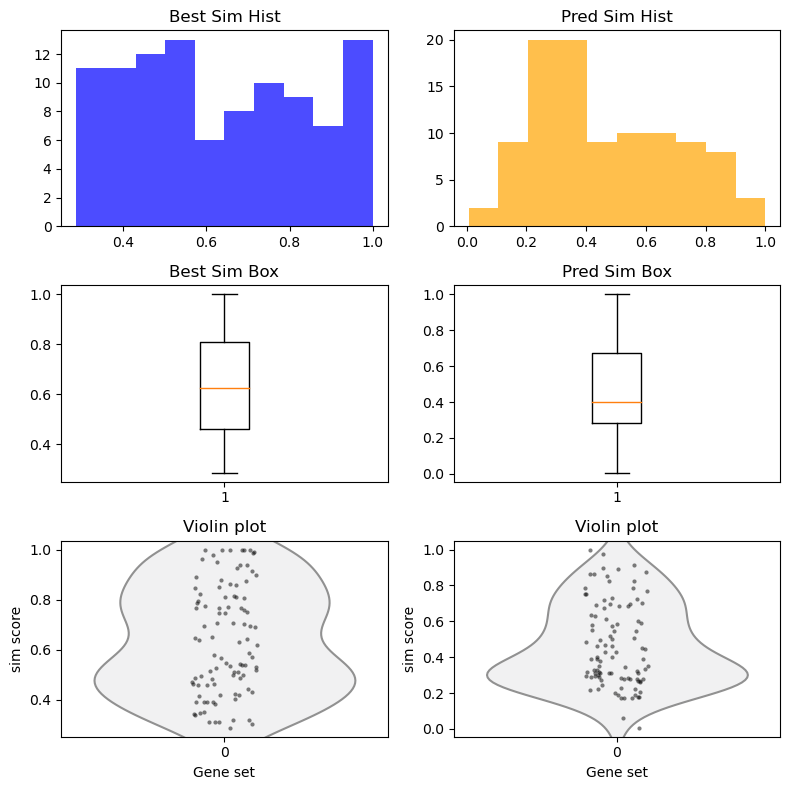

In [234]:
best_sim = []
final_sim = []
for r in tot2_eval_15gen_5steps_no_certainty_9nodes:
    best_sim.append(r['best similarity score'])
    final_sim.append(r['final answer similarity score'])

print('best_sim')
print('count', len(best_sim))
print('mean', round(sum(best_sim)/len(best_sim),4))

print('')
print('final_sim')
print('count', len(final_sim))
print('mean', round(sum(final_sim)/len(final_sim),4))

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Upper Left: Histogram 1
axs[0, 0].hist(best_sim, color='blue', alpha=0.7)
axs[0, 0].set_title('Best Sim Hist')

# Upper Right: Histogram 2
axs[0, 1].hist(final_sim, color='orange', alpha=0.7)
axs[0, 1].set_title('Pred Sim Hist')

# Lower Left: Box Plot 1
axs[1, 0].boxplot(best_sim)
axs[1, 0].set_title('Best Sim Box')

# Lower Right: Box Plot 2
axs[1, 1].boxplot(final_sim)
axs[1, 1].set_title('Pred Sim Box')

# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 0], data=best_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 0], data=best_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 0].set_title('Violin plot')
axs[2, 0].set_xlabel('Gene set')
axs[2, 0].set_ylabel('sim score')


# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 1], data=final_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 1], data=final_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 1].set_title('Violin plot')
axs[2, 1].set_xlabel('Gene set')
axs[2, 1].set_ylabel('sim score')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [235]:
def prediction_report(sims, quantile, th=0.5):
    th_98 = []
    for s in sims:
        if s > 0.5:
            th_98.append(1)
        else:
            th_98.append(0)
    
    print(f'average: {sum(sims)/len(sims)}')
    print(f'average {th}: {sum(th_98)/len(th_98)}')
    print(f'average quan: {sum(quantile)/len(quantile)}')

best_sim = []
final_sim = []
best_sim_quan = []
final_sim_quan = []

for r in tot2_eval_15gen_5steps_no_certainty_9nodes:
    best_sim.append(r['best similarity score'])
    final_sim.append(r['final answer similarity score'])
    best_sim_quan.append(r['best candidate similarity quantile'])
    final_sim_quan.append(r['final answer similarity quantile'])

print('best')
prediction_report(best_sim, best_sim_quan)
print('final')
prediction_report(final_sim, final_sim_quan)


best_sim = []
final_sim = []
best_sim_quan = []
final_sim_quan = []

for r in tot_results2:
    best_sim.append(r['best similarity score'])
    final_sim.append(r['final answer similarity score'])
    best_sim_quan.append(r['best candidate similarity quantile'])
    final_sim_quan.append(r['final answer similarity quantile'])

print()
print('best 2')
prediction_report(best_sim, best_sim_quan)
print('final 2')
prediction_report(final_sim, final_sim_quan)

best
average: 0.6383634248375892
average 0.5: 0.66
average quan: 0.9568192238414929
final
average: 0.467392935231328
average 0.5: 0.4
average quan: 0.7781463893892251

best 2
average: 0.6575529605150223
average 0.5: 0.7666666666666667
average quan: 0.9686288958026308
final 2
average: 0.39869662672281264
average 0.5: 0.3
average quan: 0.7238469515856121


In [227]:
best_sim = []
final_sim = []
best_sim_quan = []
final_sim_quan = []

for r in gprofiler_results[:30]:
    best_sim.append(r['best similarity score'])
    final_sim.append(r['final answer similarity score'])
    best_sim_quan.append(r['best candidate similarity quantile'])
    final_sim_quan.append(r['final answer similarity quantile'])
    
prediction_report(best_sim, best_sim_quan)
prediction_report(final_sim, final_sim_quan)

average: 0.6758718411127727
average 0.5: 0.7333333333333333
average quan: 0.9788603242181105
average: 0.41030851056178413
average 0.5: 0.3
average quan: 0.7111320342776047


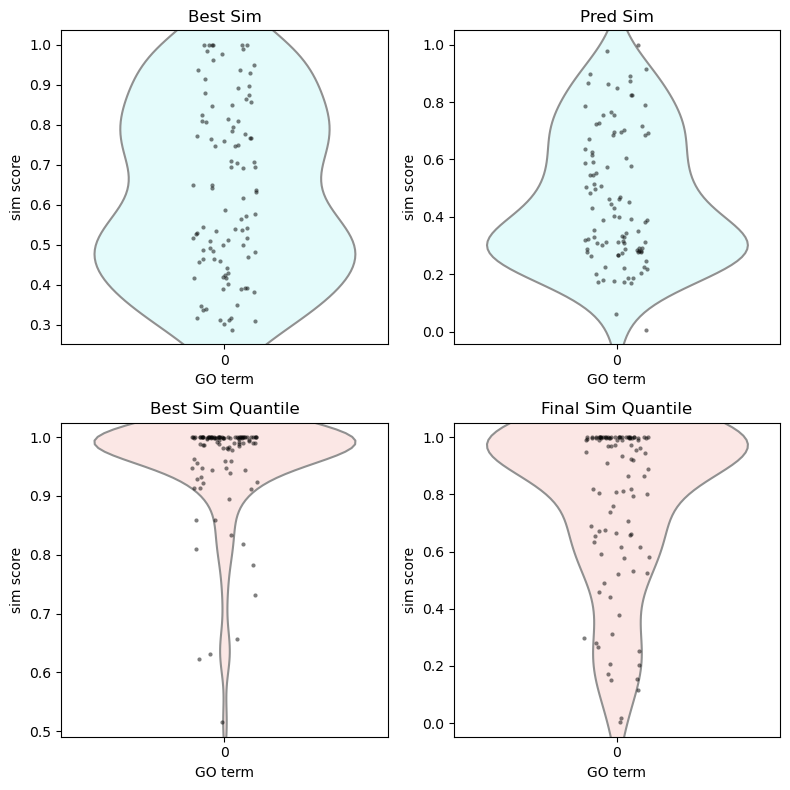

In [236]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

best_sim = []
final_sim = []
best_sim_quan = []
final_sim_quan = []

for r in tot2_eval_15gen_5steps_no_certainty_9nodes:
    best_sim.append(r['best similarity score'])
    final_sim.append(r['final answer similarity score'])
    best_sim_quan.append(r['best candidate similarity quantile'])
    final_sim_quan.append(r['final answer similarity quantile'])
    

# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[0, 0], data=best_sim, inner=None, color="lightcyan")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[0, 0], data=best_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[0, 0].set_title('Best Sim')
axs[0, 0].set_xlabel('GO term')
axs[0, 0].set_ylabel('sim score')


# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[0, 1], data=final_sim, inner=None, color="lightcyan")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[0, 1], data=final_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[0, 1].set_title('Pred Sim')
axs[0, 1].set_xlabel('GO term')
axs[0, 1].set_ylabel('sim score')

# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[1, 0], data=best_sim_quan, inner=None, color="mistyrose")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[1, 0], data=best_sim_quan, color='k', size=3, jitter=True, alpha=0.5)
axs[1, 0].set_title('Best Sim Quantile')
axs[1, 0].set_xlabel('GO term')
axs[1, 0].set_ylabel('sim score')


# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[1, 1], data=final_sim_quan, inner=None, color="mistyrose")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[1, 1], data=final_sim_quan, color='k', size=3, jitter=True, alpha=0.5)
axs[1, 1].set_title('Final Sim Quantile')
axs[1, 1].set_xlabel('GO term')
axs[1, 1].set_ylabel('sim score')


# best_sim = []
# final_sim = []
# best_sim_quan = []
# final_sim_quan = []

# for r in gprofiler_results:
#     best_sim.append(r['best similarity score'])
#     final_sim.append(r['final answer similarity score'])
#     best_sim_quan.append(r['best candidate similarity quantile'])
#     final_sim_quan.append(r['final answer similarity quantile'])

# print('best_sim')
# print('count', len(best_sim))
# print('mean', round(sum(best_sim)/len(best_sim),3))

# print('')
# print('final_sim')
# print('count', len(final_sim))
# print('mean', round(sum(final_sim)/len(final_sim),3))



# # Upper Left: Histogram 1
# axs[0, 0].hist(best_sim, color='blue', alpha=0.7)
# axs[0, 0].set_title('Best Sim Hist')

# # Upper Right: Histogram 2
# axs[0, 1].hist(final_sim, color='orange', alpha=0.7)
# axs[0, 1].set_title('Pred Sim Hist')

# # Lower Left: Box Plot 1
# axs[1, 0].boxplot(best_sim)
# axs[1, 0].set_title('Best Sim Box')

# # Lower Right: Box Plot 2
# axs[1, 1].boxplot(final_sim)
# axs[1, 1].set_title('Pred Sim Box')



# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()




best_sim
count 55
mean 0.97

final_sim
count 55
mean 0.792


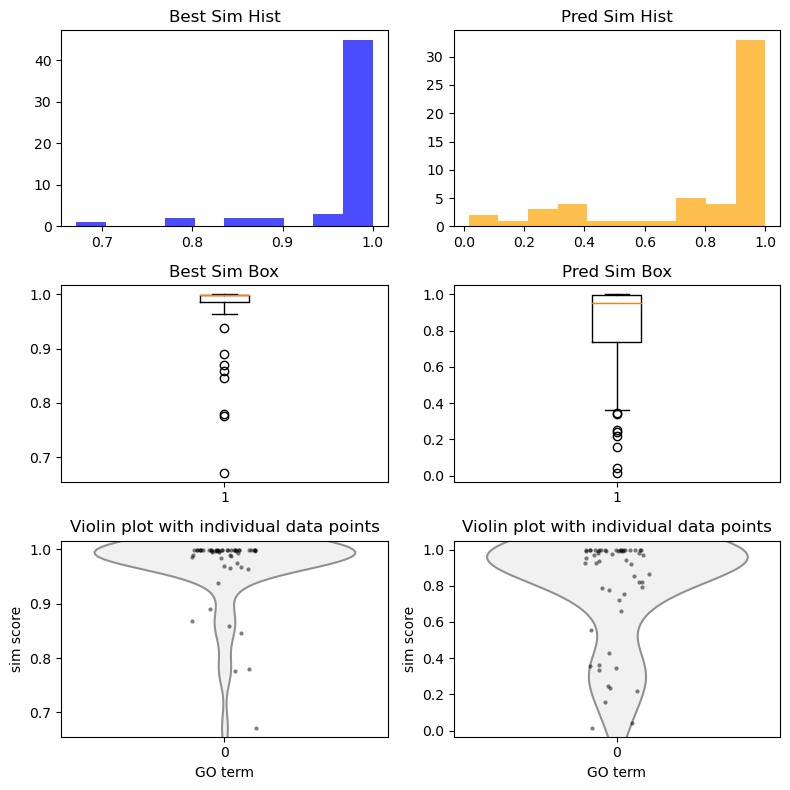

In [12]:
best_sim = []
final_sim = []
for r in tot_results:
    best_sim.append(r['best candidate similarity quantile'])
    final_sim.append(r['final answer similarity quantile'])

print('best_sim')
print('count', len(best_sim))
print('mean', round(sum(best_sim)/len(best_sim),3))

print('')
print('final_sim')
print('count', len(final_sim))
print('mean', round(sum(final_sim)/len(final_sim),3))

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Upper Left: Histogram 1
axs[0, 0].hist(best_sim, color='blue', alpha=0.7)
axs[0, 0].set_title('Best Sim Hist')

# Upper Right: Histogram 2
axs[0, 1].hist(final_sim, color='orange', alpha=0.7)
axs[0, 1].set_title('Pred Sim Hist')

# Lower Left: Box Plot 1
axs[1, 0].boxplot(best_sim)
axs[1, 0].set_title('Best Sim Box')

# Lower Right: Box Plot 2
axs[1, 1].boxplot(final_sim)
axs[1, 1].set_title('Pred Sim Box')

# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 0], data=best_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 0], data=best_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 0].set_title('Violin plot with individual data points')
axs[2, 0].set_xlabel('GO term')
axs[2, 0].set_ylabel('sim score')


# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 1], data=final_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 1], data=final_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 1].set_title('Violin plot with individual data points')
axs[2, 1].set_xlabel('GO term')
axs[2, 1].set_ylabel('sim score')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

ToT sim
count 55
mean 0.4615
G sim
final_sim
count 49
mean 0.4406


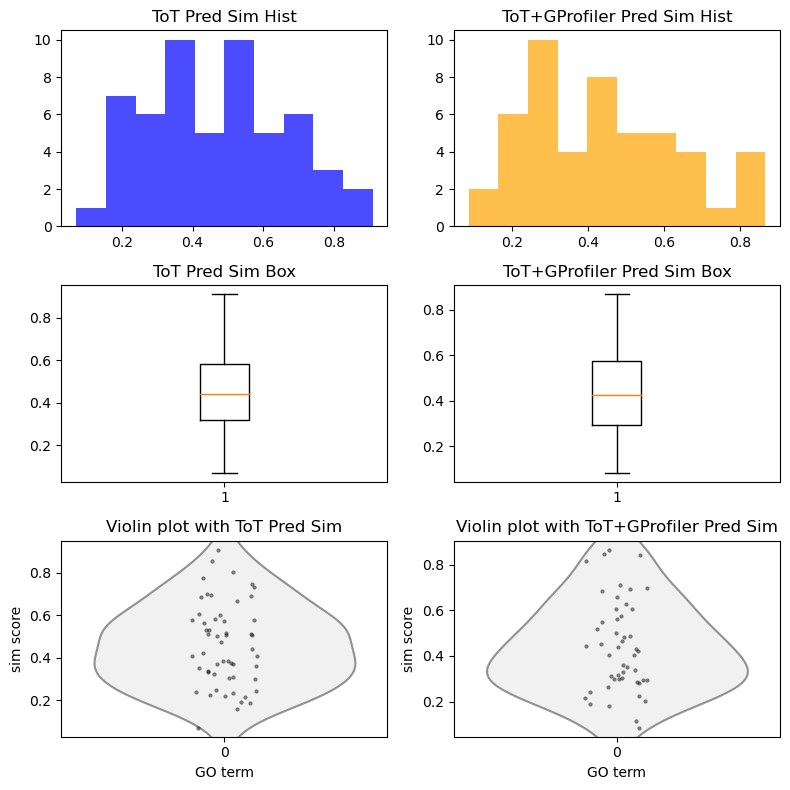

In [13]:
g_sim = []
t_sim = []
for r in tot_results:
    t_sim.append(r['final answer similarity score'])
    
for r in gprofiler_results:
    g_sim.append(r['final answer similarity score'])
print('ToT sim')
print('count', len(t_sim))
print('mean', round(sum(t_sim)/len(t_sim),4))

print('G sim')
print('final_sim')
print('count', len(g_sim))
print('mean', round(sum(g_sim)/len(g_sim),4))

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Upper Left: Histogram 1
axs[0, 0].hist(t_sim, color='blue', alpha=0.7)
axs[0, 0].set_title('ToT Pred Sim Hist')

# Upper Right: Histogram 2
axs[0, 1].hist(g_sim, color='orange', alpha=0.7)
axs[0, 1].set_title('ToT+GProfiler Pred Sim Hist')

# Lower Left: Box Plot 1
axs[1, 0].boxplot(t_sim)
axs[1, 0].set_title('ToT Pred Sim Box')

# Lower Right: Box Plot 2
axs[1, 1].boxplot(g_sim)
axs[1, 1].set_title('ToT+GProfiler Pred Sim Box')

# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 0], data=t_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 0], data=t_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 0].set_title('Violin plot with ToT Pred Sim')
axs[2, 0].set_xlabel('GO term')
axs[2, 0].set_ylabel('sim score')


# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 1], data=g_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 1], data=g_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 1].set_title('Violin plot with ToT+GProfiler Pred Sim')
axs[2, 1].set_xlabel('GO term')
axs[2, 1].set_ylabel('sim score')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

best_sim
count 49
mean 0.672

final_sim
count 49
mean 0.441


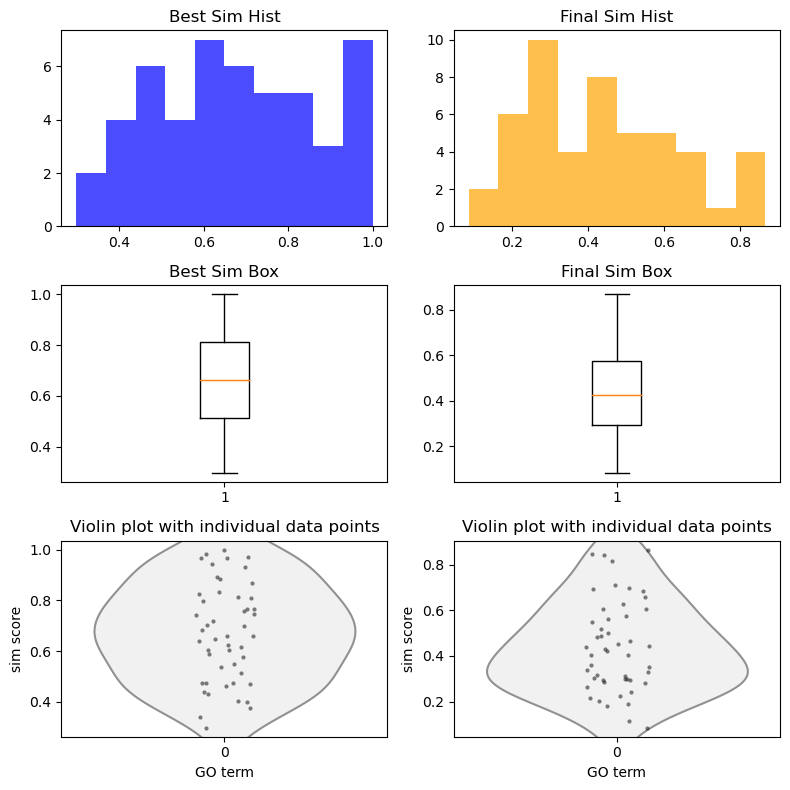

In [14]:
best_sim = []
final_sim = []
for r in gprofiler_results:
    best_sim.append(r['best similarity score'])
    final_sim.append(r['final answer similarity score'])

print('best_sim')
print('count', len(best_sim))
print('mean', round(sum(best_sim)/len(best_sim),3))

print('')
print('final_sim')
print('count', len(final_sim))
print('mean', round(sum(final_sim)/len(final_sim),3))

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Upper Left: Histogram 1
axs[0, 0].hist(best_sim, color='blue', alpha=0.7)
axs[0, 0].set_title('Best Sim Hist')

# Upper Right: Histogram 2
axs[0, 1].hist(final_sim, color='orange', alpha=0.7)
axs[0, 1].set_title('Final Sim Hist')

# Lower Left: Box Plot 1
axs[1, 0].boxplot(best_sim)
axs[1, 0].set_title('Best Sim Box')

# Lower Right: Box Plot 2
axs[1, 1].boxplot(final_sim)
axs[1, 1].set_title('Final Sim Box')


# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 0], data=best_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 0], data=best_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 0].set_title('Violin plot with individual data points')
axs[2, 0].set_xlabel('GO term')
axs[2, 0].set_ylabel('sim score')


# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 1], data=final_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 1], data=final_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 1].set_title('Violin plot with individual data points')
axs[2, 1].set_xlabel('GO term')
axs[2, 1].set_ylabel('sim score')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

best_sim
count 49
mean 0.972

final_sim
count 49
mean 0.767


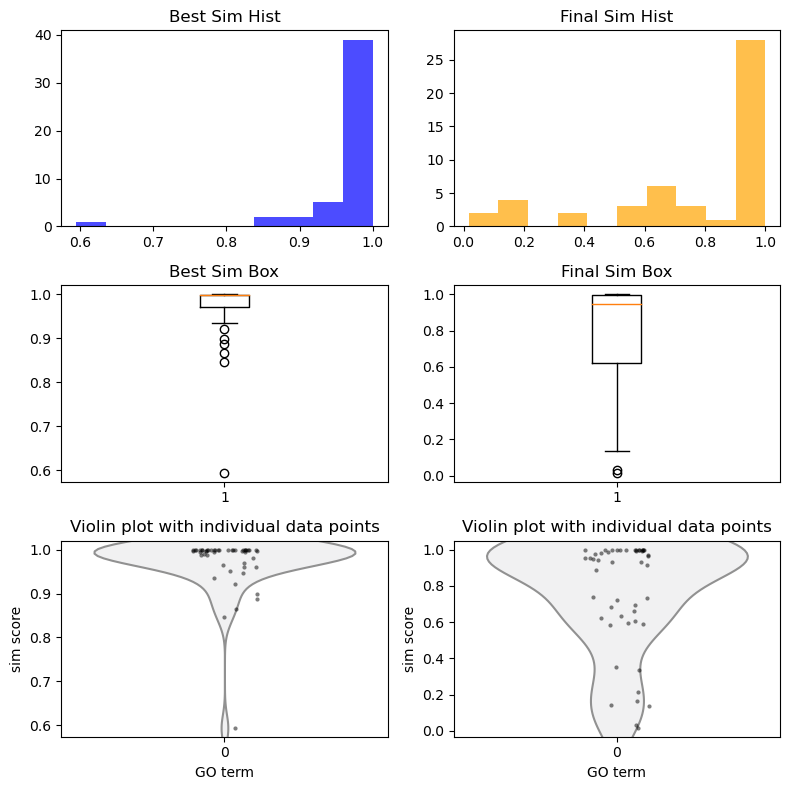

In [15]:
best_sim = []
final_sim = []
for r in gprofiler_results:
    best_sim.append(r['best candidate similarity quantile'])
    final_sim.append(r['final answer similarity quantile'])

print('best_sim')
print('count', len(best_sim))
print('mean', round(sum(best_sim)/len(best_sim),3))

print('')
print('final_sim')
print('count', len(final_sim))
print('mean', round(sum(final_sim)/len(final_sim),3))

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Upper Left: Histogram 1
axs[0, 0].hist(best_sim, color='blue', alpha=0.7)
axs[0, 0].set_title('Best Sim Hist')

# Upper Right: Histogram 2
axs[0, 1].hist(final_sim, color='orange', alpha=0.7)
axs[0, 1].set_title('Final Sim Hist')

# Lower Left: Box Plot 1
axs[1, 0].boxplot(best_sim)
axs[1, 0].set_title('Best Sim Box')

# Lower Right: Box Plot 2
axs[1, 1].boxplot(final_sim)
axs[1, 1].set_title('Final Sim Box')


# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 0], data=best_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 0], data=best_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 0].set_title('Violin plot with individual data points')
axs[2, 0].set_xlabel('GO term')
axs[2, 0].set_ylabel('sim score')


# Violin plot with individual data points in the first subplot
sns.violinplot(ax=axs[2, 1], data=final_sim, inner=None, palette="light:b")  # 'inner=None' removes the inner bars inside the violins
sns.stripplot(ax=axs[2, 1], data=final_sim, color='k', size=3, jitter=True, alpha=0.5)
axs[2, 1].set_title('Violin plot with individual data points')
axs[2, 1].set_xlabel('GO term')
axs[2, 1].set_ylabel('sim score')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [74]:
import argparse
from tot.methods.bfs import solve
from tot.tasks.bio_name import Bio_Name
from eval_utils import *
from tqdm import tqdm_notebook
# def getSentenceEmbedding(sentence, tokenizer, model):
#     # Tokenize sentences
#     encoded_input = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt')

#     # Compute token embeddings
#     with torch.no_grad():
#         model_output = model(**encoded_input)
        
#     # Perform pooling. In this case, mean pooling.
#     sentence_embedding = mean_pooling(model_output, encoded_input['attention_mask'])
    
#     return sentence_embedding

def similarity_score(pred, label):
    pred = pred.lower()
    label = label.lower()
    pred_embedding = getSentenceEmbedding(pred, SapBERT_tokenizer, SapBERT_model)
    label_embedding = all_go_terms_embeddings_dict[label]
    similarity_score = cosine_similarity(pred_embedding, label_embedding)[0][0]
    return similarity_score

def similarity_percentile(similarity_score, pred):
    pred_embedding = getSentenceEmbedding(pred, SapBERT_tokenizer, SapBERT_model)
    null_dist = []
    for term in all_go_terms_embeddings_dict.keys():
        term_embedding = all_go_terms_embeddings_dict[term]
        sentenceSim = cosine_similarity(pred_embedding, term_embedding)[0][0]
        null_dist.append(sentenceSim)
    # get similarity percentile
    null_dist = np.array(null_dist)
    # return the fraction of scores that are smaller than the candidate
    percentile = (null_dist < similarity_score).mean()
    return percentile

def get_terms_by_layer(trie):
    layers = {}
    layer_num = 1
    root = trie.root
    queue = [root]
    while queue:
        children = []
        layer = []
        for node in queue:
            if node.children:
                children.extend(node.children.values())
                layer.extend(node.children.keys())
        if layer:
            layers[layer_num] = layer
            queue = children
            layer_num += 1
        else:
            break
    return layers

task = Bio_Name()

tot_data = tot_results
tot_data_by_layer = {}
for idx in tqdm_notebook(range(0, 55)):
    print(idx)
    example_dic = {}
    tot_data_dict = tot_data[idx]
    genes = task.get_input(idx)
    num_genes = len(genes.split(' '))
    label = tot_data_dict['label']
    trie = tot_data_dict['trie']
    layers = get_terms_by_layer(trie)
    best_answer = tot_data_dict['best candidate process']
    example_dic = {'genes': genes, 'num_genes': num_genes, 'label': label, 'best answer': best_answer, 'layers': {}}
    for layer_num, terms in layers.items():
        layer_dic = {}
        for term in terms:
            term_sim_score = similarity_score(term, label)
            term_sim_quantile = similarity_percentile(term_sim_score, term)
            layer_dic[term] = {'similarity score': term_sim_score, 'similarity quantile': term_sim_quantile}
        example_dic['layers'][layer_num] = layer_dic
    tot_data_by_layer[idx] = example_dic

/tmp/ipykernel_1700570/485978771.py:64: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx in tqdm_notebook(range(0, 55)):


  0%|          | 0/55 [00:00<?, ?it/s]

0
1
2


KeyError: 'nucleotide-excision repair, dna incision'

In [ ]:
best_score_by_layer = {}
for idx, example_dic in tot_data_by_layer.items():
    for layer_num, terms in example_dic['layers'].items():
        if layer_num not in best_score_by_layer.keys():
            best_score_by_layer[layer_num] = []
        layer_scores = []
        for term, term_dic in terms.items():
            score = term_dic['similarity score']
            layer_scores.append(score)
        best_score_by_layer[layer_num].append(np.max(layer_scores))
        
best_scores = []
layer_nums = []
for layer_num, score_lst in best_score_by_layer.items():
    for score in score_lst:
        layer_nums.append(layer_num)
        best_scores.append(score)
        
# Now create a box plot
plt.figure(figsize=(10, 6))

# Group the quantiles by layer numbers
layer_groups = [[] for _ in range(max(layer_nums) + 1)]  # create a list of lists for groups
for num, score in zip(layer_nums, best_scores):
    layer_groups[num].append(score)

# Remove the empty first group if layer numbers start from 1
if layer_nums[0] == 1:
    layer_groups = layer_groups[1:]

# Create the box plot
plt.boxplot(layer_groups)
plt.xlabel('Layer Number')
plt.ylabel('Similarity Score')
plt.title('Boxplot of Best Scores by Layer Number')
plt.grid(False)
plt.show()

In [86]:
import json
json.loads(tot_results[0]['steps']['steps'][0]['select_new_ys'][0])

{'Step': '1',
 'Biological Process': 'Lipid metabolic process',
 'Reason': 'LDLRAP1 is involved in the receptor-mediated endocytosis of low-density lipoprotein, SCP2D1 and SCP2 are involved in lipid transport and metabolism, and ANXA2 has a role in membrane-related processes, often implicated in lipid interactions.'}

In [89]:
tot_results[0]

{'index': 0,
 'final answer': 'Clathrin-mediated LDL receptor endocytosis',
 'ys': ['{"Step": "5", "Relation": "part of", "Reason": "The biological process of clathrin-mediated endocytosis is a crucial step in LDL receptor recycling, as it is the mechanism by which LDL receptors are internalized along with LDL particles. The LDLRAP1 gene is known to interact with components of the clathrin-mediated endocytosis pathway, aiding in the internalization process.", "Biological Process": "Clathrin-mediated LDL receptor endocytosis"}',
  '{"Step": "5", "Relation": "has part", "Reason": "Intracellular cholesterol transport is a critical component of cellular cholesterol homeostasis, which involves the distribution of cholesterol within the cell to various organelles. The gene SCP2 (Sterol Carrier Protein 2) is known to be involved in the intracellular transport of lipids, including cholesterol.", "Biological Process": "Intracellular cholesterol transport"}'],
 'steps': {'steps': [{'step': 0,
  

In [ ]:
new_results = []
for r in tot_results:
    new_dict = {}
    label = r['label']
    count_genes = len(r['steps']['steps'][0]['x'].strip().split(' '))
    best_layer = ''
    for step in r['steps']['steps']:
        ys = []
        sim_list = []
        for s in step['select_new_ys']:
            s = json.load(s) 
            y = s['Biological Process']
            sim = similarity_score(y, label)
            ys.append(y)
            sim_list.append(sim)
            
        new_results.append(ys)
        new_results.append(sim_list)
    

In [96]:
import pandas as pd
df = pd.read_csv('results/tot.csv')

In [97]:
df.head()

,layer_1_term_1,index,x,y_pred,y_true,y_best,final_ans_in_last_layer,y_pred_similarity_score,y_pred_similarity_percentile,y_best_similarity_score,...,layer_5_term_2,layer_5_term_2_votes,layer_5_term_3,layer_5_term_3_votes,layer_5_term_4,layer_5_term_4_votes,layer_5_term_5,layer_5_term_5_votes,layer_5_term_6,layer_5_term_6_votes
0,Lipid metabolic process,0,LDLRAP1 SCP2D1 ANXA2 SCP2,Clathrin-mediated LDL receptor endocytosis,positive regulation of intracellular cholester...,Intracellular cholesterol transport,True,0.387097,0.926560,0.811226,...,LDL receptor to early endosome transport,0,LDL receptor exocytosis,0,LDL receptor recycling,0,Intracellular cholesterol transport,1,Phospholipid membrane organization,0
1,Immune system process,1,NOD1 HLA-DRA CLEC4A HLA-DRB1 CCL21 NOD2 CCL19 ...,MHC class II antigen processing and presentation,dendritic cell antigen processing and presenta...,Antigen uptake and processing by dendritic cells,True,0.746869,0.997544,0.928318,...,Exogenous antigen processing for MHC class II,0,Invariant chain degradation,0,MHC class II antigen processing and presentation,*,Chemokine-mediated signaling pathway,1,CD4+ T cell co-stimulation,0
2,DNA repair,2,OGG1 ERCC5 XPA ERCC4 NTHL1,DNA damage recognition in GG-NER,"nucleotide-excision repair, DNA incision",Nucleotide excision repair,True,0.710893,0.999591,0.823891,...,Recruitment of DNA repair endonucleases in GG-NER,1,DNA helix unwinding in GG-NER,0,DNA damage recognition in GG-NER,*,DNA repair synthesis in GG-NER,0,DNA ligation in GG-NER,0
3,Transport,3,SLC7A11 SLC25A39 SLC26A6 ABCB9 SLC15A4 ABCC5 C...,Proton-coupled oligopeptide transmembrane tran...,oligopeptide transmembrane transport,Proton-coupled oligopeptide transmembrane tran...,True,0.909905,0.999918,0.909905,...,Histidine transport,0,Regulation of proton-coupled amino acid transport,1,ABCC1-mediated drug transport,0,ABCC4-involved regulation of intracellular cAM...,0,ABCC5-mediated glutamate transport,0
4,Signal transduction,4,OPN3 CDH3 ATP7A APPL1 ASIP RAB38 ZEB2 TYRP1 GIPC1,Non-visual phototransduction,positive regulation of melanin biosynthetic pr...,Melanin biosynthetic process,True,0.326392,0.720239,0.766809,...,Melanogenesis regulation by non-visual opsins,1,Epithelial cell adhesion regulation by non-vis...,0,Tyrosinase-related protein 1 activity,0,DOPAchrome tautomerase activity,0,Melanosome organization,0


In [128]:
import pandas as pd

# # Example DataFrame
# data = {
#     'A': ['foo', 'bar', 'baz'],
#     'B': ['foo', 'abc', 'baz'],
#     'y_best': ['foo', 'bar', 'baz']
# }
# df = pd.DataFrame(data)

def find_matching_columns(row):
    matches = []
    for col in df.columns:
        # Check if the column matches and is not 'y_best' or 'y_pred'
        if row[col] == row['y_best'] and col not in ['y_best', 'y_pred']:
            # Extract the layer number if it's a layer column
            if 'layer' in col:
                layer_num = int(col.split('_')[1])
                matches.append(layer_num)
    return matches#[-1]

def count_genes(row):
    row.strip()

# Apply the function to each row
df['matched'] = df.apply(find_matching_columns, axis=1)

# Function to count the number of genes
def count_genes(gene_string):
    # Split the string by spaces and filter out empty strings
    genes = [gene for gene in gene_string.split(' ') if gene]
    return len(genes)

# Apply the function to the 'x' column
df['gene counts'] = df['x'].apply(count_genes)


In [129]:
df

,layer_1_term_1,index,x,y_pred,y_true,y_best,final_ans_in_last_layer,y_pred_similarity_score,y_pred_similarity_percentile,y_best_similarity_score,...,layer_5_term_3,layer_5_term_3_votes,layer_5_term_4,layer_5_term_4_votes,layer_5_term_5,layer_5_term_5_votes,layer_5_term_6,layer_5_term_6_votes,matched,gene counts
0,Lipid metabolic process,0,LDLRAP1 SCP2D1 ANXA2 SCP2,Clathrin-mediated LDL receptor endocytosis,positive regulation of intracellular cholester...,Intracellular cholesterol transport,True,0.387097,0.926560,0.811226,...,LDL receptor exocytosis,0,LDL receptor recycling,0,Intracellular cholesterol transport,1,Phospholipid membrane organization,0,[5],4
1,Immune system process,1,NOD1 HLA-DRA CLEC4A HLA-DRB1 CCL21 NOD2 CCL19 ...,MHC class II antigen processing and presentation,dendritic cell antigen processing and presenta...,Antigen uptake and processing by dendritic cells,True,0.746869,0.997544,0.928318,...,Invariant chain degradation,0,MHC class II antigen processing and presentation,*,Chemokine-mediated signaling pathway,1,CD4+ T cell co-stimulation,0,[4],15
2,DNA repair,2,OGG1 ERCC5 XPA ERCC4 NTHL1,DNA damage recognition in GG-NER,"nucleotide-excision repair, DNA incision",Nucleotide excision repair,True,0.710893,0.999591,0.823891,...,DNA helix unwinding in GG-NER,0,DNA damage recognition in GG-NER,*,DNA repair synthesis in GG-NER,0,DNA ligation in GG-NER,0,"[2, 2]",5
3,Transport,3,SLC7A11 SLC25A39 SLC26A6 ABCB9 SLC15A4 ABCC5 C...,Proton-coupled oligopeptide transmembrane tran...,oligopeptide transmembrane transport,Proton-coupled oligopeptide transmembrane tran...,True,0.909905,0.999918,0.909905,...,Regulation of proton-coupled amino acid transport,1,ABCC1-mediated drug transport,0,ABCC4-involved regulation of intracellular cAM...,0,ABCC5-mediated glutamate transport,0,[5],15
4,Signal transduction,4,OPN3 CDH3 ATP7A APPL1 ASIP RAB38 ZEB2 TYRP1 GIPC1,Non-visual phototransduction,positive regulation of melanin biosynthetic pr...,Melanin biosynthetic process,True,0.326392,0.720239,0.766809,...,Epithelial cell adhesion regulation by non-vis...,0,Tyrosinase-related protein 1 activity,0,DOPAchrome tautomerase activity,0,Melanosome organization,0,"[2, 3]",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Cell communication,95,PCDH8 MDGA1 LRFN3 MAPK14,Synaptic adhesion molecule signaling,regulation of synaptic membrane adhesion,Synaptic membrane adhesion,True,0.762614,0.999673,0.819332,...,Regulation of neuronal precursor cell prolifer...,0,Dendritic spine morphogenesis,0,Synaptic adhesion molecule signaling,*,Dendritic spine stabilization,1,[5],4
96,Neurological system process,96,NPY OPRM1 GHSR GHRL,Ghrelin-induced orexigenic signaling,positive regulation of appetite,Regulation of appetite,True,0.534440,0.992386,0.802078,...,Modulation of opioid signaling by ghrelin,0,Ghrelin-induced orexigenic signaling,*,Neuropeptide Y (NPY) synthesis and release,0,Opioid receptor signaling in appetite control,0,"[1, 2]",4
97,Developmental process,97,BMP4 TGFB1 MYCN TRUB1,BMP4 signaling pathway in osteoblast different...,positive regulation of miRNA maturation,Transcriptional regulation by MYCN,True,0.270530,0.458736,0.340439,...,MYCN transcriptional control in osteoblast dif...,0,Melanocyte differentiation,0,Peripheral nervous system development,0,Skeletal system development,0,[2],4
98,Cell communication,98,TIMP4 TIMP3 TIMP2 TIMP1 ROCK1 PTPN3 LRIG2 IL10,Regulation of extracellular matrix organization,negative regulation of membrane protein ectodo...,Negative regulation of extracellular matrix di...,True,0.320816,0.681431,0.600371,...,Angiogenesis regulation,0,Inhibition of matrix metalloproteinase activity,1,Regulation of collagen catabolic process,0,Cellular response to cytokines,0,[4],8


In [125]:
df['matched']

0     5
1     4
2     2
3     5
4     3
     ..
95    5
96    2
97    2
98    4
99    2
Name: matched, Length: 100, dtype: int64

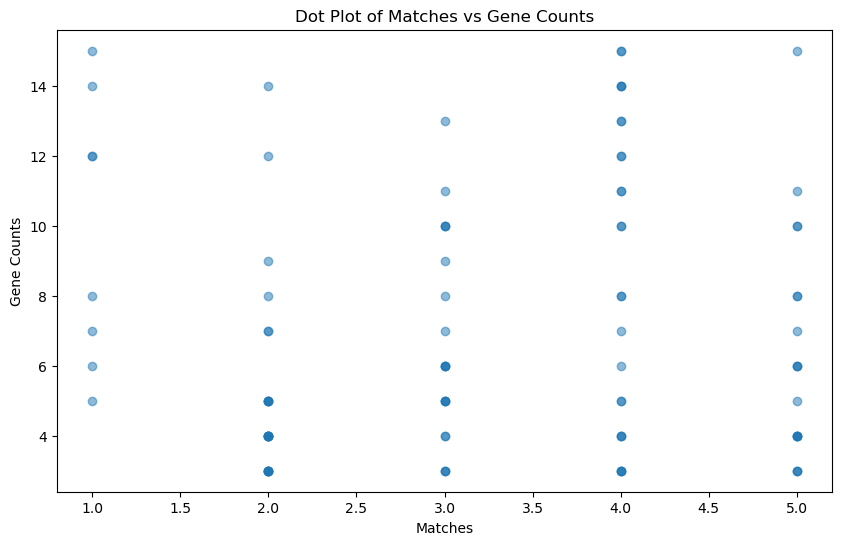

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.scatter(df['matched'], df['gene counts'], alpha=0.5)
plt.title('Dot Plot of Matches vs Gene Counts')
plt.xlabel('Matches')
plt.ylabel('Gene Counts')
# plt.grid(True)
plt.show()

/tmp/ipykernel_1700570/2423044999.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='matched', y='gene counts', data=df, ax=axes[0], ci=None)


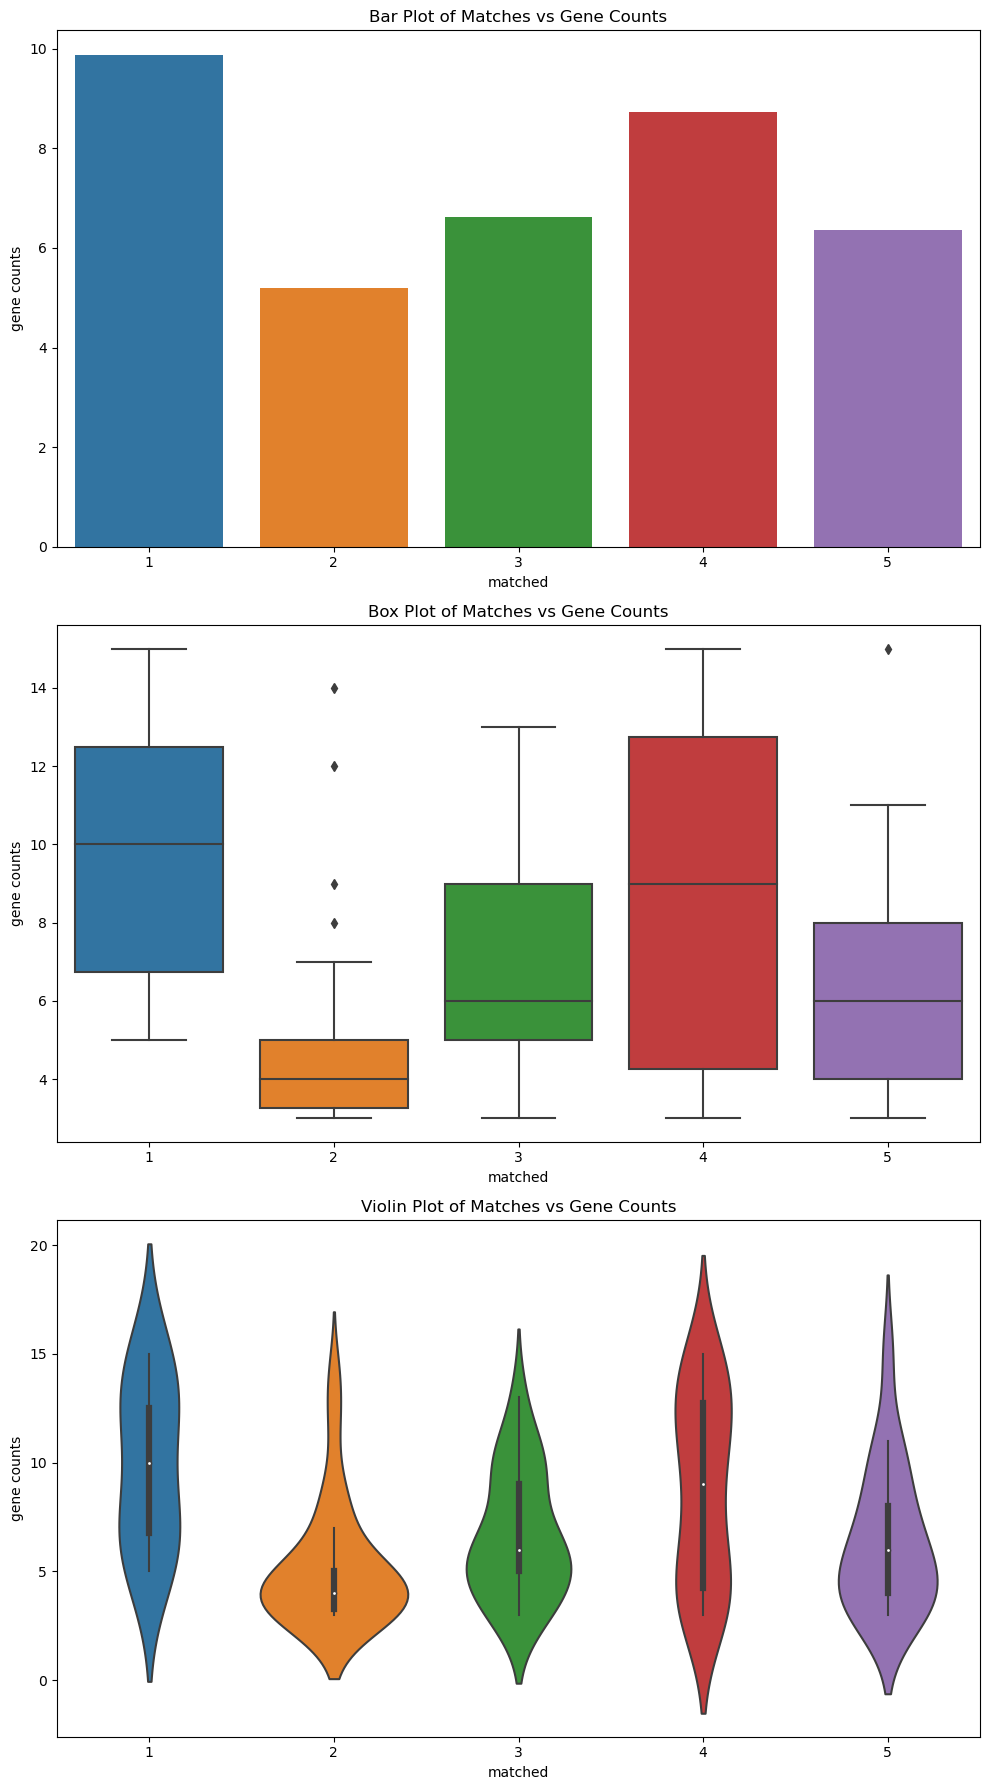

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# For the purpose of demonstration, let's create a random DataFrame
# since we don't have the actual data from the user.
import numpy as np
np.random.seed(0)
# data = {
#     'matches': np.random.randint(1, 6, 100),
#     'gene counts': np.random.poisson(5, 100)
# }
# df = pd.DataFrame(data)

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Bar plot
sns.barplot(x='matched', y='gene counts', data=df, ax=axes[0], ci=None)
axes[0].set_title('Bar Plot of Matches vs Gene Counts')

# Box plot
sns.boxplot(x='matched', y='gene counts', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Matches vs Gene Counts')

# Violin plot
sns.violinplot(x='matched', y='gene counts', data=df, ax=axes[2])
axes[2].set_title('Violin Plot of Matches vs Gene Counts')

plt.tight_layout()
plt.show()

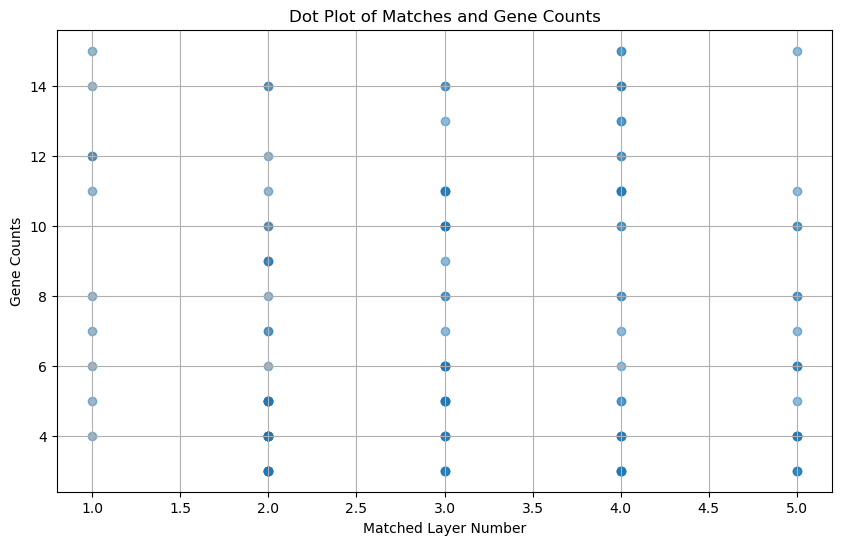

In [130]:
# Preparing the data for plotting
# Flatten the 'matched' list and repeat 'gene counts' accordingly
x = []
y = []
for index, row in df.iterrows():
    for match in row['matched']:
        x.append(match)
        y.append(row['gene counts'])

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Dot Plot of Matches and Gene Counts')
plt.xlabel('Matched Layer Number')
plt.ylabel('Gene Counts')
plt.grid(True)
plt.show()

/tmp/ipykernel_1700570/2028374749.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x, y=y, data=df, ax=axes[0], ci=None)


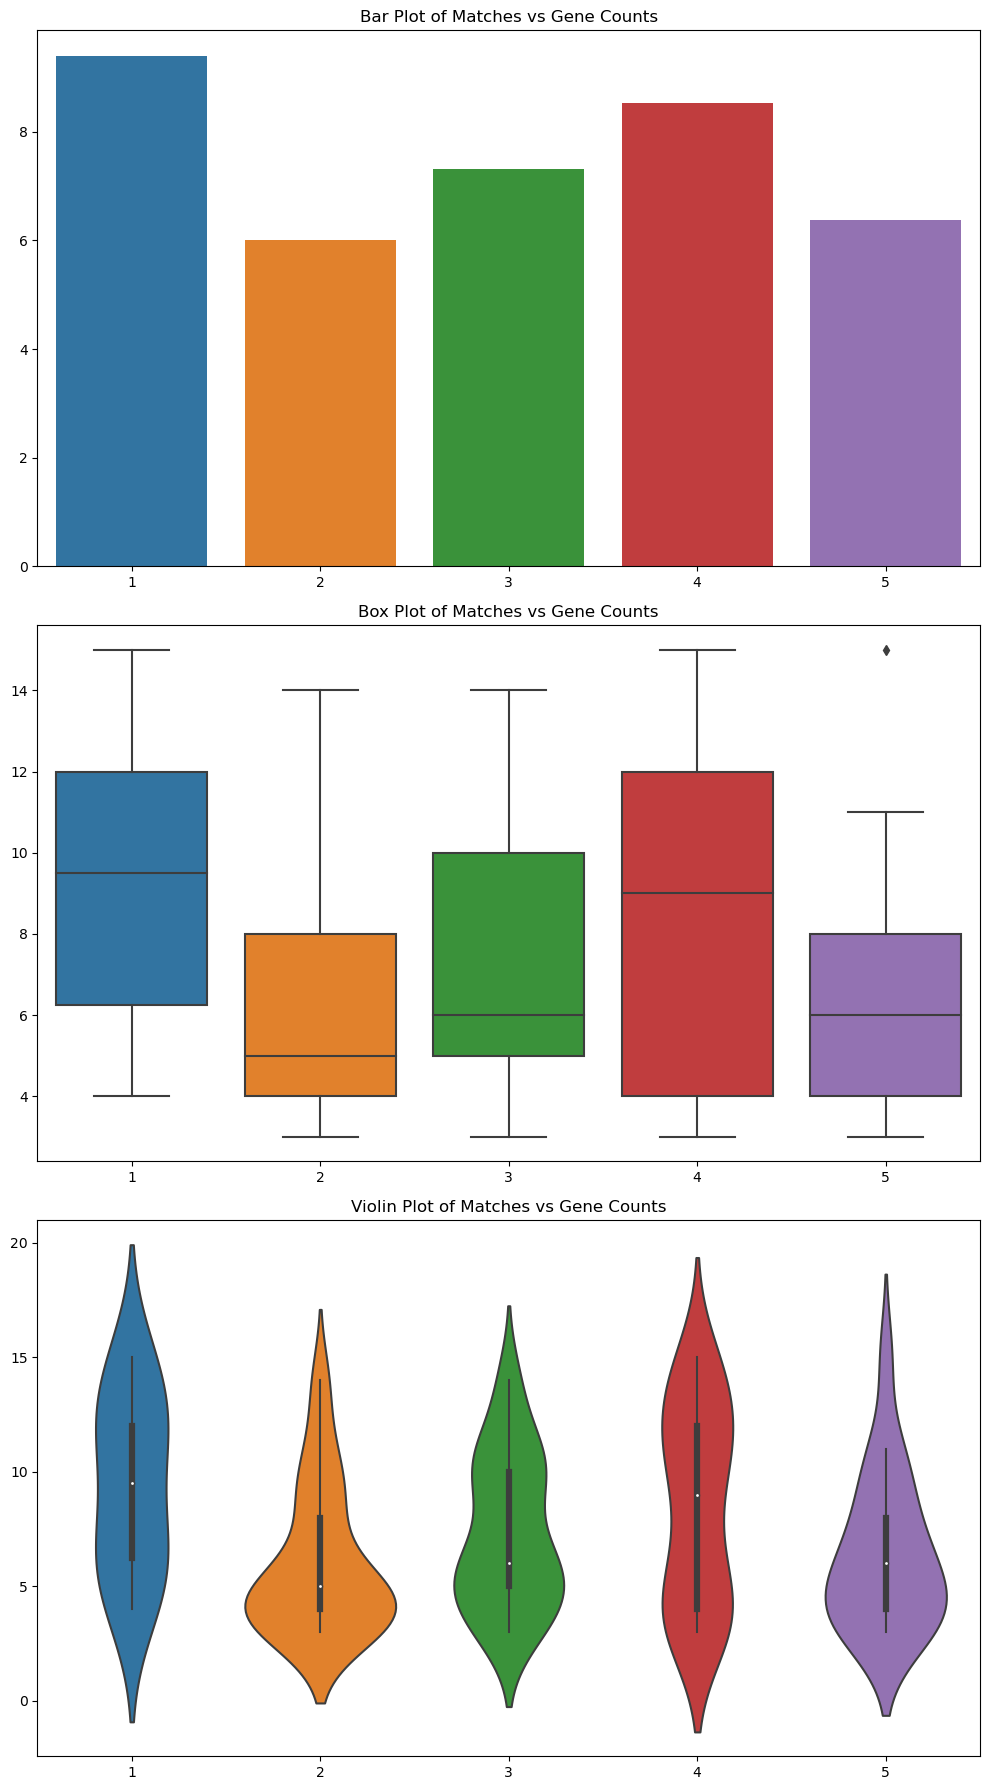

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# For the purpose of demonstration, let's create a random DataFrame
# since we don't have the actual data from the user.
import numpy as np
np.random.seed(0)
# data = {
#     'matches': np.random.randint(1, 6, 100),
#     'gene counts': np.random.poisson(5, 100)
# }
# df = pd.DataFrame(data)

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Bar plot
sns.barplot(x=x, y=y, data=df, ax=axes[0], ci=None)
axes[0].set_title('Bar Plot of Matches vs Gene Counts')

# Box plot
sns.boxplot(x=x, y=y, data=df, ax=axes[1])
axes[1].set_title('Box Plot of Matches vs Gene Counts')

# Violin plot
sns.violinplot(x=x, y=y, data=df, ax=axes[2])
axes[2].set_title('Violin Plot of Matches vs Gene Counts')

plt.tight_layout()
plt.show()